<a href="https://colab.research.google.com/github/fpelogia/Optimization-and-Neural-Networks/blob/master/RedesNeurais_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Redes Neurais
[Voltar](https://colab.research.google.com/drive/1zGxVatpjlZtdtECAikT1eKP7EQ50m-Ur)

#7 - Aumentando o número de camadas ocultas

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg as la 
%matplotlib inline

epsilon = 0.0001

def reLu(x):
    return 0.5*(x + np.sqrt(x**2 + epsilon))


def sigmoid(x):
    return 1/(1+np.exp(-1*x)) 

class Layer():
    def __init__(self, n_values, func = "none"):
        self.n_values = n_values
        self.func = func
        self.arr = np.random.randn(n_values)
        self.biases = np.random.randn(n_values)

    
class NeuralNetwork():
  
    def __init__(self, layers, learning_rate = 0.0005 ,optimizer = "backpropagation"):
        self.layers = layers
        self.n_layers = len(layers)
        self.optimizer = optimizer
        self.learning_rate = learning_rate
        #inicializa as matrizes com os pesos
        for i in range(len(self.layers) - 1):
            n_curr = self.layers[i].n_values
            n_next = self.layers[i+1].n_values
            self.layers[i].weights = np.random.randn(n_curr,n_next)

    def train_step(self, input, target):

        self.layers[0].arr = input


        # Feed-Forward
        for i in range(self.n_layers):
            
            if i!= 0:
                self.layers[i].arr = np.dot(self.layers[i-1].arr, self.layers[i-1].weights)        
                self.layers[i].arr = np.add(self.layers[i].arr, self.layers[i].biases)
                
                if self.layers[i].func == "sigmoid":
                    for j in range(self.layers[i].n_values):
                        self.layers[i].arr[0][j] = sigmoid(self.layers[i].arr[0][j]) 
                elif self.layers[i].func == "relu":
                    for j in range(self.layers[i].n_values):
                        self.layers[i].arr[0][j] = reLu(self.layers[i].arr[0][j]) 
                else:
                    if not self.layers[i].func == "linear":
                        print("ERROR: unknown activation function {}".format(self.layers[i].func))

        output = self.layers[self.n_layers-1].arr

        # Otimização
   
        if self.optimizer == "backpropagation":

            for i in range(self.n_layers-1,0,-1):
                if i == self.n_layers-1:
                    error = target - output
                else:
                    error = np.dot(error, np.transpose(self.layers[i].weights))

                if self.layers[i].func == "linear":
                    d_func = 1
                elif self.layers[i].func == "sigmoid":
                    d_func = self.layers[i].arr*(1 - self.layers[i].arr)
                elif self.layers[i].func == "relu":
                    d_func = 0.5*(self.layers[i].arr/np.sqrt(self.layers[i].arr**2 + epsilon) + 1)
                else:
                    print("ERROR: unknown activation function {}".format(self.layers[self.n_layers - 1].func))

                gradient = self.learning_rate * error * d_func
                
                
                self.layers[i].biases = np.add(self.layers[i].biases, gradient)

                weights_deltas = np.dot(np.transpose(self.layers[i-1].arr), gradient)
                
                self.layers[i-1].weights = np.add(self.layers[i-1].weights, weights_deltas)
        # IMPLEMENTAR PARA MÉTODO DO GRADIENTE TBM

    def predict(self, input):

        self.layers[0].arr = input

        # Feed-Forward
        for i in range(len(self.layers)):
            if i!= 0:
                self.layers[i].arr = np.dot(self.layers[i-1].arr, self.layers[i-1].weights)        
                self.layers[i].arr = np.add(self.layers[i].arr, self.layers[i].biases)
                
                if self.layers[i].func == "sigmoid":
                    for j in range(self.layers[i].n_values):
                        self.layers[i].arr[0][j] = sigmoid(self.layers[i].arr[0][j]) 
                elif self.layers[i].func == "relu":
                    for j in range(self.layers[i].n_values):
                        self.layers[i].arr[0][j] = reLu(self.layers[i].arr[0][j]) 
                else:
                    if not self.layers[i].func == "linear":
                        print("ERROR: unknown activation function {}".format(self.layers[i].func))

        output = self.layers[self.n_layers-1].arr
        return output
    
    
    def train(self, trainning_set, labels, epochs=1000):
        for _ in range(epochs):
            index  = np.random.randint(len(trainning_set))
            self.train_step(trainning_set[index], labels[index]) 
            
    def train2(self, X, y,ep = 1000):
        for i in range(ep):
          for j in range(len(X)):
            self.train_step(X[j], y[j])
    
            






##7.1 - Duas camadas ocultas
![rede](https://drive.google.com/uc?id=1yfezKD8NpPxqYm8XH7wCkh77jyIvI9sN)

In [0]:

layers = [Layer(1), Layer(2,"relu"), Layer(2,"relu"),Layer(1,"linear")]
X = np.array([1.0, 2.0, 3.0, 4.0, 5.0])
y = X**2

mynn = NeuralNetwork(layers, 0.0001, optimizer= "backpropagation")
mynn.train2(X, y)

ex = np.linspace(0,100,100)
ey = [mynn.predict(val)[0] for val in ex]


    
plt.axis([0,10,0,30])


plt.scatter(X,y,s = 30, c = "red")
plt.plot(ex,ey)


#TESTES

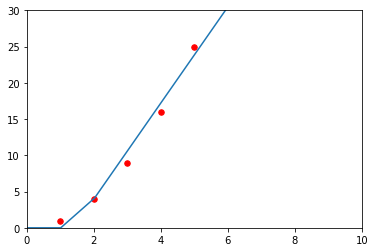

In [0]:


layers = [Layer(1), Layer(2,"relu"), Layer(2,"relu"),Layer(2,"relu"),Layer(1,"relu")]
X = np.array([1.0, 2.0, 3.0, 4.0, 5.0])
y = X**2

mynn = NeuralNetwork(layers, 0.0001, optimizer= "backpropagation")
mynn.train(X, y, 10000)

ex = np.linspace(0,100,100)
ey = [mynn.predict(val)[0] for val in ex]


    
plt.axis([0,10,0,30])


plt.scatter(X,y,s = 30, c = "red")
plt.plot(ex,ey)

